In [1]:
from numpy import array, dot, random
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [2]:
sig = lambda x : 1.0/(1.0+mt.exp(-x*1.0))
def relu(x):
    if x > 0.0:
        return x
    elif x == 0.0:
        return 0.5*x
    else:
        return 0.0

dif_sig = lambda x : sig(x)*(1.0-sig(x))
def dif_relu(x):
    if x > 0.0:
        return 1.0
    elif x == 0.0:
        return 0.5
    else:
        return 0.0

func = sig
dif_func = dif_sig

random.seed(seed=20181115)

In [3]:
# OR
'''data = [
    (array([1,0,0]),0),
    (array([1,0,1]),1),
    (array([1,1,0]),1),
    (array([1,1,1]),1)
]'''

# AND
data = [
    (array([1,0,0]),0),
    (array([1,0,1]),0),
    (array([1,1,0]),0),
    (array([1,1,1]),1)
]

# XOR
'''data = [
    (array([1,0,0]),0),
    (array([1,0,1]),1),
    (array([1,1,0]),1),
    (array([1,1,1]),0)
]'''

# 도넛모양
'''data = [
    (array([1,0,0]),0),
    (array([1,0,0.5]),0),
    (array([1,0,1]),0),
    (array([1,0.5,0]),0),
    (array([1,0.5,0.5]),1),
    (array([1,0.5,1]),0),
    (array([1,1,0]),0),
    (array([1,1,0.5]),0),
    (array([1,1,1]),0)
]'''

'data = [\n    (array([1,0,0]),0),\n    (array([1,0,0.5]),0),\n    (array([1,0,1]),0),\n    (array([1,0.5,0]),0),\n    (array([1,0.5,0.5]),1),\n    (array([1,0.5,1]),0),\n    (array([1,1,0]),0),\n    (array([1,1,0.5]),0),\n    (array([1,1,1]),0)\n]'


n=20
x1=0.000000, x2=0.000000, y=0.000000, fx=0.335682, Error=0.056341
x1=0.000000, x2=1.000000, y=0.000000, fx=0.375710, Error=0.070579
x1=1.000000, x2=0.000000, y=0.000000, fx=0.246383, Error=0.030352
x1=1.000000, x2=1.000000, y=1.000000, fx=0.276047, Error=0.262054

n=40
x1=0.000000, x2=0.000000, y=0.000000, fx=0.286136, Error=0.040937
x1=0.000000, x2=1.000000, y=0.000000, fx=0.377551, Error=0.071272
x1=1.000000, x2=0.000000, y=0.000000, fx=0.277118, Error=0.038397
x1=1.000000, x2=1.000000, y=1.000000, fx=0.360593, Error=0.204421

n=60
x1=0.000000, x2=0.000000, y=0.000000, fx=0.242285, Error=0.029351
x1=0.000000, x2=1.000000, y=0.000000, fx=0.376539, Error=0.070891
x1=1.000000, x2=0.000000, y=0.000000, fx=0.300349, Error=0.045105
x1=1.000000, x2=1.000000, y=1.000000, fx=0.439366, Error=0.157155

n=80
x1=0.000000, x2=0.000000, y=0.000000, fx=0.202310, Error=0.020465
x1=0.000000, x2=1.000000, y=0.000000, fx=0.365520, Error=0.066802
x1=1.000000, x2=0.000000, y=0.000000, fx=0.309177, E

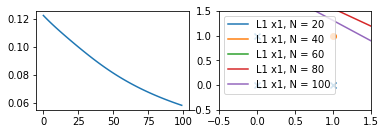

In [12]:
fig = plt.figure()
subplot = fig.add_subplot(2,2,2)
subplot.set_xlim(-0.5,1.5)
subplot.set_ylim(-0.5,1.5)

train_set0_x1=[]
train_set0_x2=[]
train_set1_x1=[]
train_set1_x2=[]

for a,b in data:
    if b==0:
        train_set0_x1.append(a[1:][0])
        train_set0_x2.append(a[1:][1])
    else:
        train_set1_x1.append(a[1:][0])
        train_set1_x2.append(a[1:][1])
subplot.scatter(train_set0_x1, train_set0_x2, marker = 'x')
subplot.scatter(train_set1_x1, train_set1_x2, marker = 'o')

linex = np.linspace(-1,30,3)

input_node = [2]    # Input Lyaer의 노드 수
hidden_node = []   # Hidden Layer의 노드 수 배열([2,3,5,4,2]와 같이 가능)
output_node = [1]   # Output Layer의 노드 수
layer = input_node + hidden_node + output_node  # 전체 Layer의 노드 수 배열
delta = []          # delta 값들을 저장할 배열
net = []            # net 값들을 저장할 배열
w=[]                # weight 값들을 저장할 배열
c = 0.2           # Learning Rate
n = 100         # Training Iteration 횟수

# Initialize
for i in range(1,len(layer)):
    temp = []       # weight 배열을 위한 temp
    temp_delta = [] # delta 배열을 위한 temp
    temp_net = []   # net 배열을 위한 temp
    for j in range(layer[i]):
        #temp.append(random.uniform(0.0,1.0, layer[i-1]+1))  
        temp.append(random.normal(0.0,1.0,size=layer[i-1]+1)) # 각 Layer의 노드 수 만큼 weight 생성
        temp_delta.append(0)                    # 각 Layer의 노드 수 만큼 delta 생성
        temp_net.append(0)                      # 각 Layer의 노드 수 만큼 net 생성
    w.append(temp)
    delta.append(temp_delta)
    net.append(temp_net)

# Training
error = []
for N in range(1,n+1):
    if N % (n/5) == 0:
        print('\nn=%d' % N)
        ################### AND, OR, XOR Gate 분석용 코드 ##############################
        '''if (len(hidden_node) == 1) and (hidden_node[0] == 2):
            subplot = fig.add_subplot(1,2,2)
            subplot.set_xlim(-0.5,1.5)
            subplot.set_ylim(-0.5,1.5)
            

            subplot.scatter(train_set0_x1, train_set0_x2, marker = 'x')
            subplot.scatter(train_set1_x1, train_set1_x2, marker = 'o')'''
            
        liney = -(w[0][0][1]*linex+w[0][0][0]-0.5)/(w[0][0][2]+0.00000000001)
        subplot.plot(linex,liney, label = 'L1 x1, N = %d' % N)

        if (len(hidden_node) == 1) and (hidden_node[0] == 2):
            liney = -(w[0][1][1]*linex+w[0][1][0]-0.5)/(w[0][1][2]+0.00000000001)
            subplot.plot(linex,liney, label = 'L1 x2, N = %d' % N)
        plt.legend(loc=2)
        ###############################################################################
    temp_error = 0
    # data에서 x,y를 가져옴
    for x,y in data: 
        x = [x]
        y = np.array([y])

        # 각 노드마다 f(net)의 값을 x에 저장
        for i in range(0,len(layer)-1):
            temp = np.array(1.0)
            for j in range(0,layer[i+1]):
                net[i][j] = dot(x[i],w[i][j])
                fx = func(net[i][j]) # f(x)
                temp = np.append(temp,fx)
            x.append(temp)
        
        # Output Layer의 Node들의 delta값들을 구함
        for i in range(layer[-1]):
            delta[-1][i] = -(y[i]-x[-1][i+1])*dif_func(net[-1][i])

        # Output Layer 이전 Layer부터 Layer1까지의 delta값들을 구함
        for i in range(len(layer)-2,0,-1):
            for j in range(layer[i]):
                _sum = 0
                for k in range(layer[i+1]):
                    _sum = _sum + delta[i][k]*w[i][k][j+1]
                delta[i-1][j] = dif_func(net[i-1][j])*_sum
        
        # Output Layer부터 Layer1까지의 Weight들을 갱신함
        for i in range(len(w)-1,-1,-1):
            for j in range(len(w[i])):
                for k in range(len(w[i][j])):
                    dw = -c*delta[i][j]*x[i][k]
                    w[i][j][k] += dw

        if N % (n/5) == 0:
            print('x1=%f, x2=%f, y=%f, fx=%f, Error=%f' % (x[0][1],x[0][2],y[0],x[len(x)-1][1],(1/2)*((y[0]-x[len(x)-1][1])**2)))
            #print('x1=%f, x2=%f, Error=%f' % (x[0][1],x[0][2],(1/2)*((y[0]-x[len(x)-1][1])**2)))
        temp_error+=(1/2)*((y[0]-x[len(x)-1][1])**2)
    error.append(temp_error/len(data))

#################### Error 그래프 코드 ########################################################
subplot_error = fig.add_subplot(2,2,1)
line_x = np.linspace(0,n,10000)
subplot_error.plot(error)
##############################################################################################


In [6]:
def calc(x):
    x = [x]
    # 각 노드마다 f(net)의 값을 x에 저장
    for i in range(0,len(layer)-1):
        temp = np.array(1.0)
        for j in range(0,layer[i+1]):
            net[i][j] = dot(x[i],w[i][j])
            fx = func(net[i][j]) # f(x)
            temp = np.append(temp,fx)
        x.append(temp)
    return x[-1][1]

locations = []
for x2 in np.linspace(-0.5, 1.5, 100):
    for x1 in np.linspace(-0.5, 1.5, 100):
        locations.append(np.array([1,x1,x2]))
p_vals = []
for x in locations:
    p_vals.append(calc(x))
p_vals = np.array(p_vals)
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin = 'lower', extent = (-0.5,1.5,-0.5,1.5),cmap=plt.cm.gray_r, alpha=0.5)
